In [160]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter

In [2]:
data = pd.read_csv('cc_info.csv')

In [3]:
print(data.dtypes)
data.head()

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


For my reference:

A cash advance is a service provided by most credit card and charge card issuers. The service allows cardholders to withdraw cash, either through an ATM or over the counter at a bank or other financial agency, up to a certain limit. For a credit card, this will be the credit limit (or some percentage of it). (Source: <a href = https://en.wikipedia.org/wiki/Cash_advance > wikipedia </a>)

An installment purchase agreement is a contract used to finance the acquisition of assets. Under the terms of such an agreement, the buyer pays the seller the full purchase price by making a series of partial payments over time. The payments include stated or imputed interest. The buyer takes title to the property at the inception of the agreement. The seller retains a security interest in the property until all of the specified payments have been made.
(Source: <a href = https://gao.az.gov/what-installment-purchase-agreement-and-can-my-agency-use-installment-purchase-agreements-finance > internet </a>)

A 'one-off purchase' is something than occurs once and only once, and is not part of a regular process or sequence. A "one-off" payment would be something you make once for some particular charge or fee, and then in the future you might pay a regular fee every month or whatever. Not recurring. (Source: <a href = https://ell.stackexchange.com/questions/106972/one-off-payment-meaning > stack_exchange </a>)
 

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The columns 'credit_limit' and 'minimum_payments' do not have all 8950 non-NA values.
Visualizing helps to check this.

In [5]:
data['CUST_ID'].unique()
len(data['CUST_ID'].unique())

8950

### All unique users, no repeatations in the data.

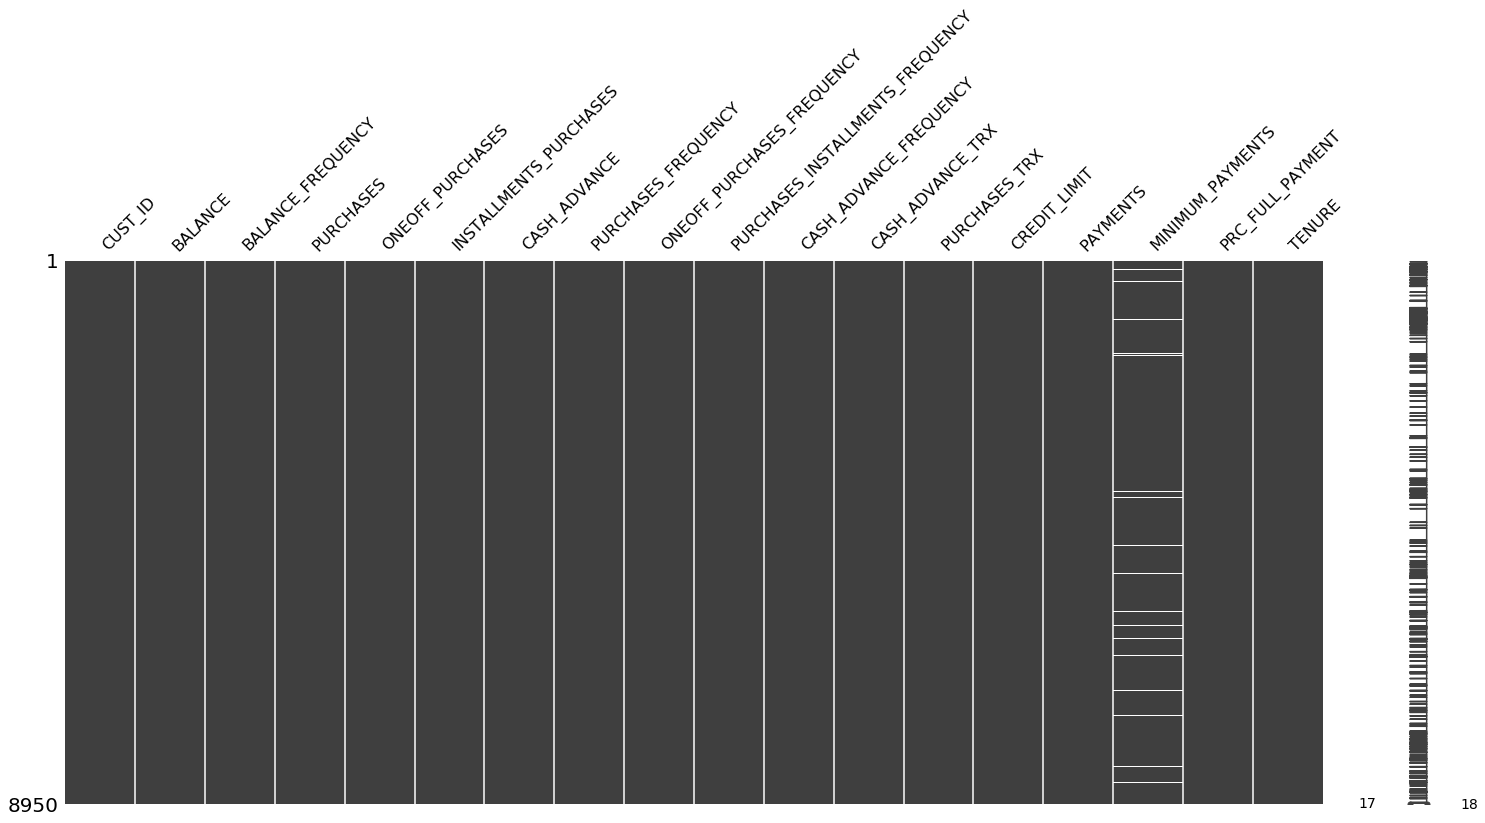

In [6]:
msno.matrix(data)

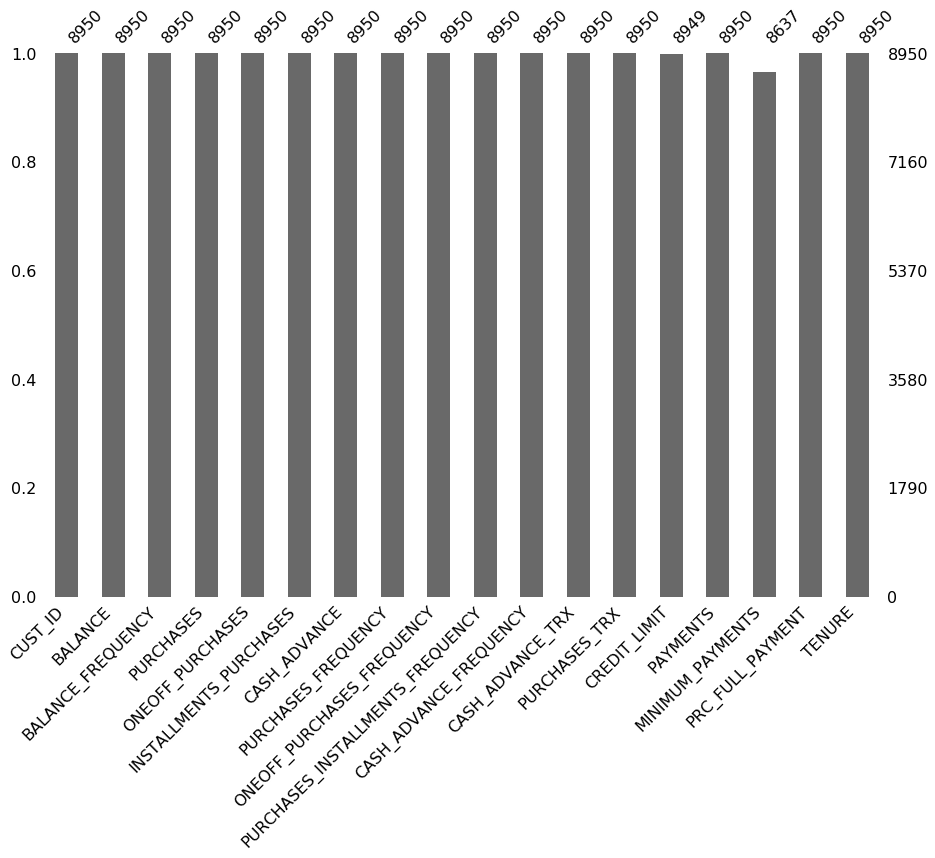

In [7]:
msno.bar(data, figsize=(15,10))

Now we can see that only in the 'minimum_payments' column there's data is missing (3.5% of the data in that column is missing). Options I can use:
- Case Deletion: Drop rows with missing data using df.dropna - this may be appropriate for 'credit_limit', since it has one NA value, I can drop that row. This may also hold for 'minimum_payments' column
- Imputation: Impute missing values - this may be appropriate for the 'minimum_payments' column.
- Do nothing: This is a good option if we don't plan on using that column in our analysis.

In [8]:
#data = data[np.isfinite(data['CREDIT_LIMIT'])]
data = data.dropna(subset = ['CREDIT_LIMIT'])

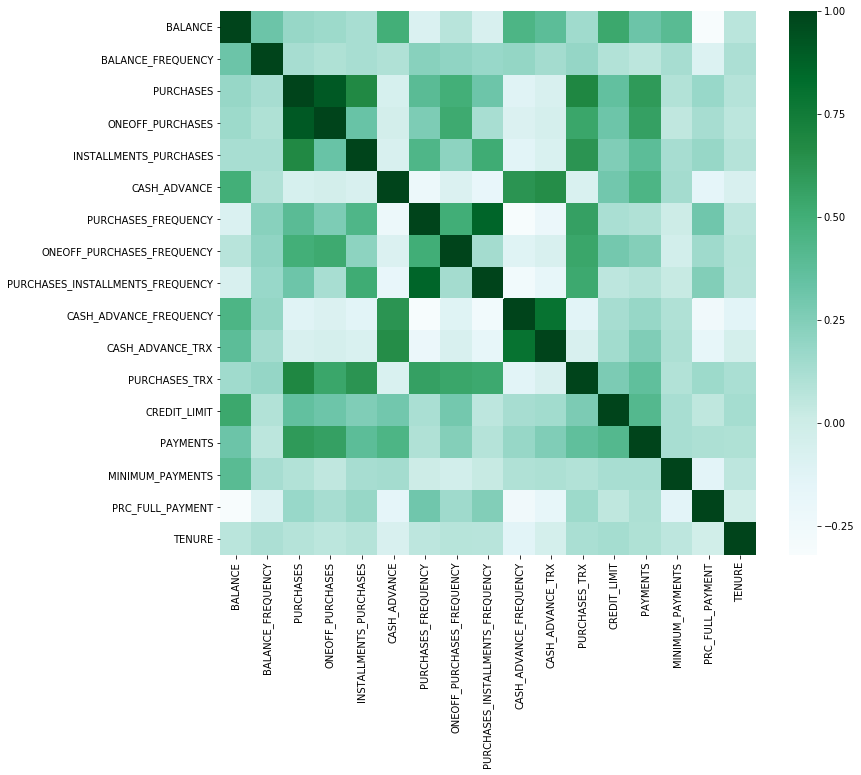

In [9]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), cmap = 'BuGn')

Correlations between the columns/instances of missing data. Here a score of -1 means that when one point is missing the other is not missing, while a score of 1 means that when one point is missing the other is also missing.

This shows that 'minimum_payments' column is not strong correlated to other features. There is a strong correlation between purchases, one-off purchases and purchases installments. (which makes sense, since they are all related to purchasing in one way or the other) 

The relation between minimum payments and balance (0.4 from the figure below) makes sense, because typically, the minimum payment is a small calculated amount of your balance or a fixed dollar value — whichever’s greater.

The minimum is usually based on a percentage of your balance — a small percentage (typically ~2%) if one owes more than \\$1000. Otherwise it is a fixed amount (~$25).

(Source: <a href = https://www.nerdwallet.com/blog/credit-cards/credit-card-issuer-minimum-payment/ > nerdwallet </a> )

In [10]:
#fancy way to do the above, just found this

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

data.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1,0.32,0.18,0.16,0.13,0.5,-0.078,0.073,-0.063,0.45,0.39,0.15,0.53,0.32,0.4,-0.32,0.072
BALANCE_FREQUENCY,0.32,1,0.13,0.1,0.12,0.099,0.23,0.2,0.18,0.19,0.14,0.19,0.096,0.065,0.13,-0.095,0.12
PURCHASES,0.18,0.13,1,0.92,0.68,-0.051,0.39,0.5,0.32,-0.12,-0.067,0.69,0.36,0.6,0.094,0.18,0.086
ONEOFF_PURCHASES,0.16,0.1,0.92,1,0.33,-0.031,0.26,0.52,0.13,-0.083,-0.046,0.55,0.32,0.57,0.049,0.13,0.064
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1,-0.064,0.44,0.21,0.51,-0.13,-0.074,0.63,0.26,0.38,0.13,0.18,0.086
CASH_ADVANCE,0.5,0.099,-0.051,-0.031,-0.064,1,-0.22,-0.087,-0.18,0.63,0.66,-0.076,0.3,0.45,0.14,-0.15,-0.069
PURCHASES_FREQUENCY,-0.078,0.23,0.39,0.26,0.44,-0.22,1,0.5,0.86,-0.31,-0.2,0.57,0.12,0.1,0.003,0.31,0.061
ONEOFF_PURCHASES_FREQUENCY,0.073,0.2,0.5,0.52,0.21,-0.087,0.5,1,0.14,-0.11,-0.069,0.54,0.3,0.24,-0.03,0.16,0.082
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1,-0.26,-0.17,0.53,0.061,0.085,0.03,0.25,0.073
CASH_ADVANCE_FREQUENCY,0.45,0.19,-0.12,-0.083,-0.13,0.63,-0.31,-0.11,-0.26,1,0.8,-0.13,0.13,0.18,0.099,-0.25,-0.13


Since the NA values in 'minimum_payments' column are ~3.5%, dropping those might be a good option. Just as a check, I plot the correlation of the dataset after removal of those rows, and the remaining entries still have the same correlation with 'balance'. It also maintains the correlation values with the other columns.

In [11]:
df = data.dropna(subset = ['MINIMUM_PAYMENTS'])

In [12]:
df = df.reset_index(drop = True)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### This is the data set I will be working with. It does not have any NA values in any of the columns.

In [13]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1,0.31,0.18,0.16,0.12,0.5,-0.088,0.064,-0.07,0.45,0.38,0.15,0.54,0.32,0.4,-0.33,0.067
BALANCE_FREQUENCY,0.31,1,0.12,0.095,0.11,0.089,0.23,0.19,0.18,0.18,0.13,0.18,0.088,0.039,0.13,-0.16,0.1
PURCHASES,0.18,0.12,1,0.92,0.68,-0.054,0.39,0.5,0.32,-0.12,-0.07,0.69,0.36,0.61,0.094,0.18,0.085
ONEOFF_PURCHASES,0.16,0.095,0.92,1,0.33,-0.033,0.27,0.52,0.13,-0.086,-0.049,0.55,0.32,0.57,0.049,0.13,0.063
INSTALLMENTS_PURCHASES,0.12,0.11,0.68,0.33,1,-0.066,0.44,0.21,0.51,-0.14,-0.077,0.63,0.26,0.39,0.13,0.18,0.083
CASH_ADVANCE,0.5,0.089,-0.054,-0.033,-0.066,1,-0.22,-0.09,-0.18,0.63,0.66,-0.078,0.3,0.46,0.14,-0.16,-0.073
PURCHASES_FREQUENCY,-0.088,0.23,0.39,0.27,0.44,-0.22,1,0.5,0.86,-0.32,-0.21,0.57,0.12,0.1,0.003,0.31,0.052
ONEOFF_PURCHASES_FREQUENCY,0.064,0.19,0.5,0.52,0.21,-0.09,0.5,1,0.14,-0.12,-0.073,0.54,0.3,0.24,-0.03,0.15,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.07,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1,-0.27,-0.17,0.53,0.063,0.083,0.03,0.25,0.066
CASH_ADVANCE_FREQUENCY,0.45,0.18,-0.12,-0.086,-0.14,0.63,-0.32,-0.12,-0.27,1,0.8,-0.14,0.13,0.18,0.099,-0.26,-0.14


In [14]:
to_plot_vals = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", \
                "CASH_ADVANCE", "CASH_ADVANCE_TRX",
               "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

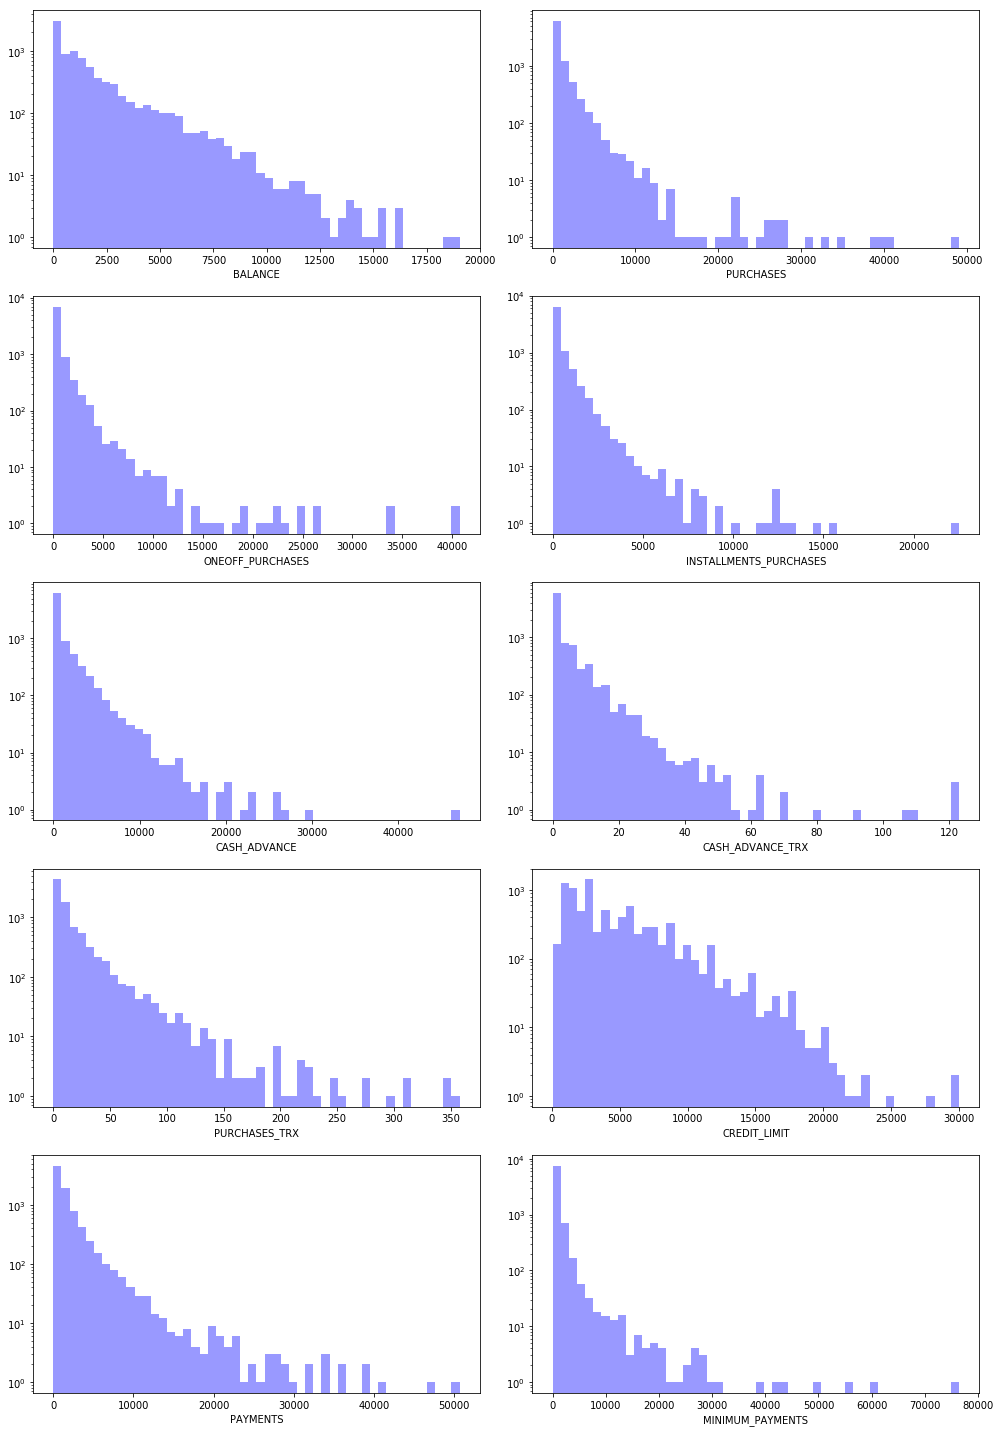

In [15]:
f, ax = plt.subplots(5, 2, figsize=(14,20))
ax = ax.flatten()
for i, col in enumerate(to_plot_vals):
    sns.distplot(df[col], ax = ax[i], kde = False, color = 'blue')
    ax[i].set_yscale('log')
    plt.tight_layout()

All the above histograms show that the quantities have a sharp decline as the amount increases.

(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 5 Text yticklabel objects>)

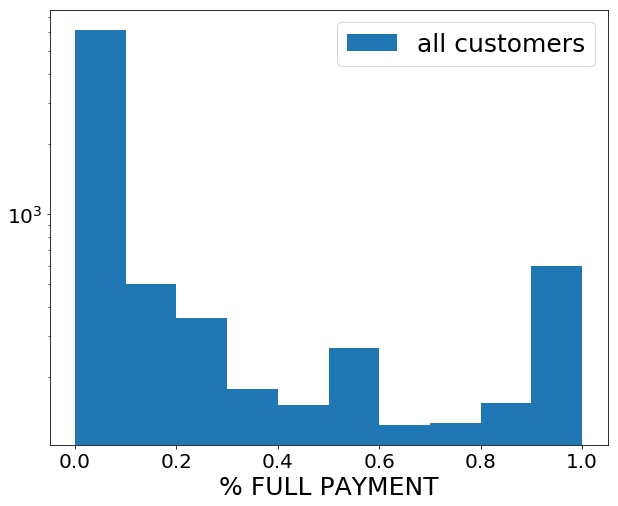

In [152]:
plt.figure(figsize = (10, 8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.hist(df['PRC_FULL_PAYMENT'], log = True, label = 'all customers')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('% FULL PAYMENT', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

In [148]:
print('This plot shows that majority of the customers are not paying the full amount due.')
print('percentage of customers failing to pay the full amount due is {:.2f}%.'\
      .format(len(df[df['PRC_FULL_PAYMENT'] != 1.0])/len(df)*100))

This plot shows that majority of the customers are not paying the full amount due.
percentage of customers failing to pay the full amount due is 94.35%.


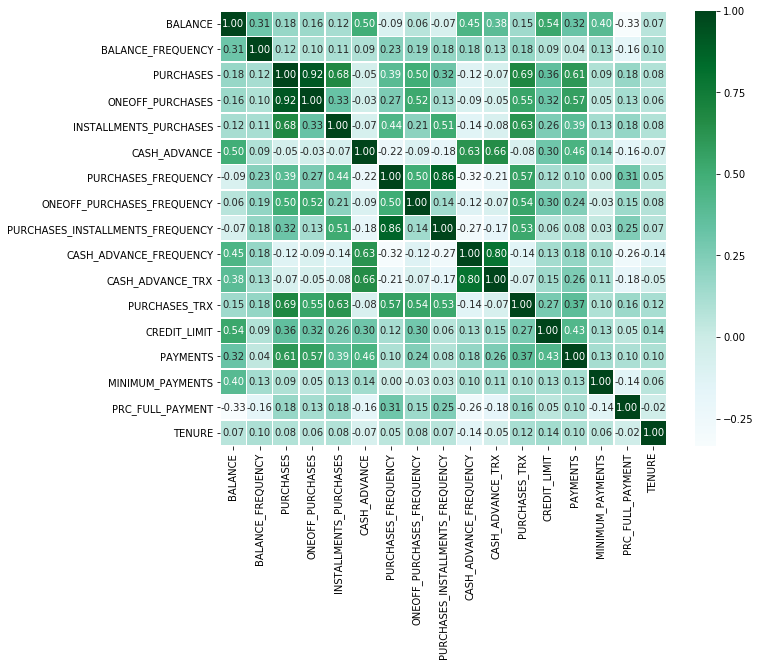

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'BuGn', annot=True, linewidths=.5, fmt= '.2f')

### Types of customers:
- Based on the amount of purchases: 
       by value - high spending, low spending
       by frequency - who is more frequent buyer
- Based on whether the customer uses the credit card for cash advances or purchases
- Based on whether the payments are more than the minimum payment due
        This can provide an idea of which customers are likely to pay their debt on time
- Based on the full payment

### Based on Purchase amount

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]), <a list of 9 Text yticklabel objects>)

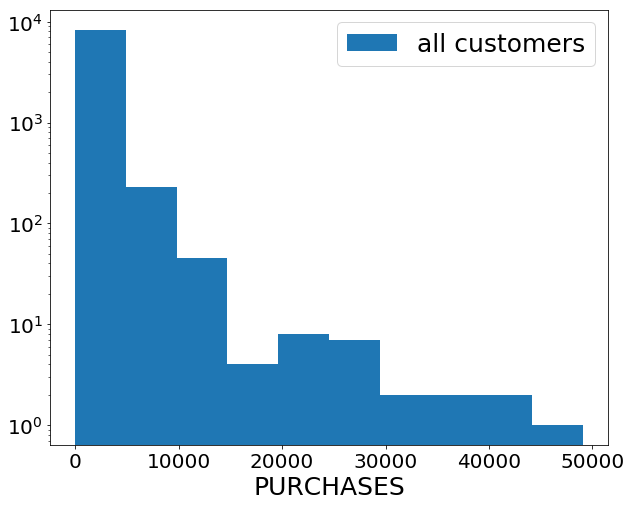

In [28]:
plt.figure(figsize=(10,8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.hist(df.PURCHASES, log = True, label = 'all customers')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('PURCHASES', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

The distribution of purchases show that there is a tail for higher spending. Trying to divide the data into two groups, by mean is a bad idea. Let's try by the quantiles.

In [23]:
print('The value of Q3 for the distribution of purchases \
amount is ${:.2f}.'.format(np.quantile(df.PURCHASES, 0.75)))

The value of Q3 for the distribution of purchases amount is $1145.98.


In [24]:
# just a check for my sake
len(df[df['PURCHASES'] > np.quantile(df.PURCHASES, 0.75)])/len(df)

0.25

Since 75% of the customers spend less than ~ $1200, it shows that majority of customers are not high spenders. Dividing the data by the Q3 value, the distribution are shown below.

(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 5 Text yticklabel objects>)

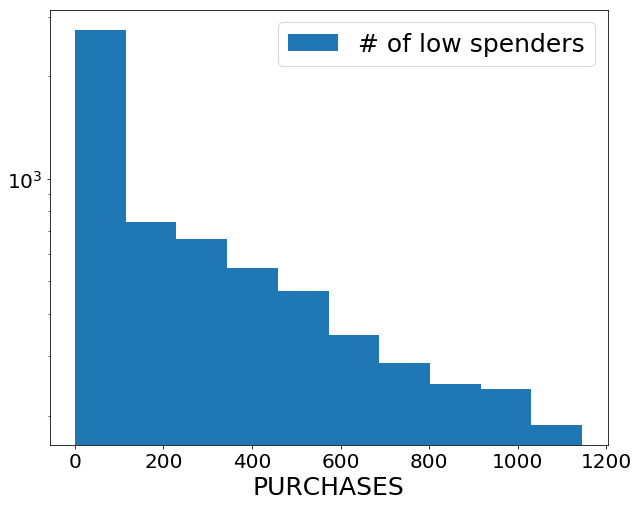

In [45]:
plt.figure(figsize=(10,8))
axis_tick_font = {'size':'20', 'color':'black'}
df_low_spend = df.loc[df['PURCHASES'] < np.quantile(df.PURCHASES, 0.75)]
df_high_spend = df.loc[df['PURCHASES'] > np.quantile(df.PURCHASES, 0.75)]
plt.hist(df_low_spend['PURCHASES'], log = True, label = '# of low spenders')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('PURCHASES', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 8 Text yticklabel objects>)

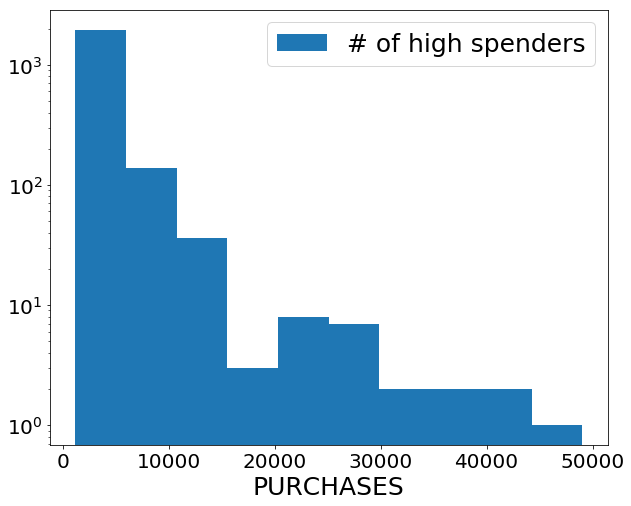

In [46]:
plt.figure(figsize=(10,8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.hist(df_high_spend['PURCHASES'], log = True, label = '# of high spenders')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('PURCHASES', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

In [48]:
print('The purchase amount for 95% of high spenders is below ${:.2f}.'\
      .format(np.quantile(df_high_spend['PURCHASES'], 0.95)))

The purchase amount for 95% of high spenders is below $8392.14.


(array([1.959e+03, 1.390e+02, 3.600e+01, 3.000e+00, 8.000e+00, 7.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([0.02337643, 0.12103879, 0.21870114, 0.3163635 , 0.41402586,
        0.51168821, 0.60935057, 0.70701293, 0.80467529, 0.90233764,
        1.        ]),
 <a list of 10 Patch objects>)

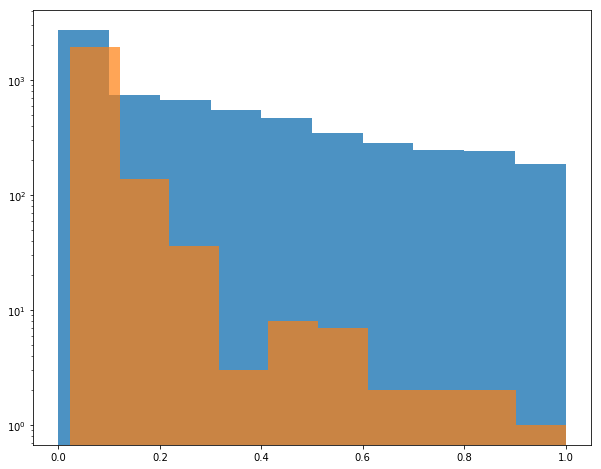

In [49]:
plt.figure(figsize = (10,8))
plt.hist(df_low_spend['PURCHASES']/(max(df_low_spend['PURCHASES'])), log = True, alpha = 0.8)
plt.hist(df_high_spend['PURCHASES']/(max(df_high_spend['PURCHASES'])), log = True, alpha = 0.7)

## Let's see how these low spenders do:
1. how many use both the cash advance as well as purchases
2. how many use solely for cash adances vs purchases
3. how many use solely for purchases
4. on paying their minimum amount due
5. how do they do the purchases - one-off payments or installments

From the data, if the cash advances is non-zero that means that they have used the credit card towards withdrawing cash (from the definition of cash advances).

In [50]:
print('percentage low spending customers who use credit card for both cash advances and \
purchases is {:.2f}%'. format((len(df_low_spend[(df_low_spend['PURCHASES'] != 0.0) \
                                & (df_low_spend['CASH_ADVANCE'] != 0.0)])/len(df_low_spend))*100))

print('percentage of low spending customers who use credit card only for cash advances and \
not purchases is {:.2f}%'. format((len(df_low_spend[(df_low_spend['PURCHASES'] == 0.0) \
                                & (df_low_spend['CASH_ADVANCE'] != 0.0)])/len(df_low_spend))*100))

print('percentage of low spending customers who use credit card for only purchases and \
not cash advances is {:.2f}%'. format((len(df_low_spend[(df_low_spend['PURCHASES'] != 0.0) \
                                & (df_low_spend['CASH_ADVANCE'] == 0.0)])/len(df_low_spend))*100))

percentage low spending customers who use credit card for both cash advances and purchases is 23.84%
percentage of low spending customers who use credit card only for cash advances and not purchases is 30.35%
percentage of low spending customers who use credit card for only purchases and not cash advances is 45.79%


(-1.1138780315853518,
 1.1163155418659207,
 -1.1298013116146326,
 1.1014192091752606)

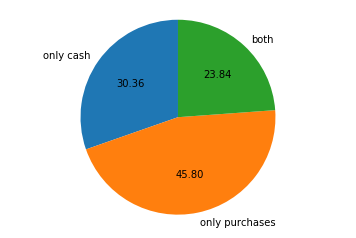

In [162]:
pie_labels = 'only cash', 'only purchases', 'both'
population_share = [30.35, 45.79, 23.84]

figureObject, axesObject = plotter.subplots()
axesObject.pie(population_share, labels=pie_labels, autopct='%1.2f', startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

### Let's examine how these low spending customers are on paying their minimum amount due.

In [51]:
df_low_both = df_low_spend[(df_low_spend['PURCHASES'] != 0.0) & (df_low_spend['CASH_ADVANCE'] != 0.0)]
df_low_cash = df_low_spend[(df_low_spend['PURCHASES'] == 0.0) & (df_low_spend['CASH_ADVANCE'] != 0.0)]
df_low_pur = df_low_spend[(df_low_spend['PURCHASES'] != 0.0) & (df_low_spend['CASH_ADVANCE'] == 0.0)]

In [52]:
# just a check
#len(df_low_spend[(df_low_spend['PURCHASES'] != 0.0) & (df_low_spend['CASH_ADVANCE'] != 0.0)]) \
#+ len(df_low_spend[(df_low_spend['PURCHASES'] == 0.0) & (df_low_spend['CASH_ADVANCE'] != 0.0)]) \
#+ len(df_low_spend[(df_low_spend['PURCHASES'] == 0.0) & (df_low_spend['CASH_ADVANCE'] == 0.0)]) \
#+ len(df_low_spend[(df_low_spend['PURCHASES'] != 0.0) & (df_low_spend['CASH_ADVANCE'] == 0.0)])

In [153]:
# there is one customer who has not used the credit card for either purchase or cash advance in the last 6 months.
df_low_spend[(df_low_spend['PURCHASES'] == 0.0) & (df_low_spend['CASH_ADVANCE'] == 0.0)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2114,C12291,391.385478,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0,0,4000.0,192.787345,227.924469,0.0,12


In [54]:
df_low_spend_good = df_low_spend[df_low_spend['PAYMENTS'] > df_low_spend['MINIMUM_PAYMENTS']]
df_low_spend_bad = df_low_spend[df_low_spend['PAYMENTS'] < df_low_spend['MINIMUM_PAYMENTS']]
print('{:.2f}% low spending customers pay more than their \
minimum amount due'.format(len(df_low_spend_good)/len(df_low_spend) *100))
print('{:.2f}% low spending customers pay less than their \
minimum amount due'.format(len(df_low_spend_bad)/len(df_low_spend) *100))



df_low_both_good = df_low_both[df_low_both['PAYMENTS'] > df_low_both['MINIMUM_PAYMENTS']]
df_low_both_bad = df_low_both[df_low_both['PAYMENTS'] < df_low_both['MINIMUM_PAYMENTS']]
print('{:.2f}% customers (both) pay more than their \
minimum amount due'.format(len(df_low_both_good)/len(df_low_both) *100))
print('{:.2f}% customers (both) pay less than their \
minimum amount due'.format(len(df_low_both_bad)/len(df_low_both) *100))



df_low_cash_good = df_low_cash[df_low_cash['PAYMENTS'] > df_low_cash['MINIMUM_PAYMENTS']]
df_low_cash_bad = df_low_cash[df_low_cash['PAYMENTS'] < df_low_cash['MINIMUM_PAYMENTS']]
print('{:.2f}% customers (cash only) pay more than their \
minimum amount due'.format(len(df_low_cash_good)/len(df_low_cash) *100))
print('{:.2f}% customers (cash only) pay more than their \
minimum amount due'.format(len(df_low_cash_bad)/len(df_low_cash) *100))



df_low_pur_good = df_low_pur[df_low_pur['PAYMENTS'] > df_low_pur['MINIMUM_PAYMENTS']]
df_low_pur_bad = df_low_pur[df_low_pur['PAYMENTS'] < df_low_pur['MINIMUM_PAYMENTS']]
print('{:.2f}% customers (purchase only) pay more than their \
minimum amount due'.format(len(df_low_pur_good)/len(df_low_pur) *100))
print('{:.2f}% customers (purchase only) pay more than their \
minimum amount due'.format(len(df_low_pur_bad)/len(df_low_pur) *100))

68.20% low spending customers pay more than their minimum amount due
31.80% low spending customers pay less than their minimum amount due
61.72% customers (both) pay more than their minimum amount due
38.28% customers (both) pay less than their minimum amount due
58.75% customers (cash only) pay more than their minimum amount due
41.25% customers (cash only) pay more than their minimum amount due
77.85% customers (purchase only) pay more than their minimum amount due
22.15% customers (purchase only) pay more than their minimum amount due


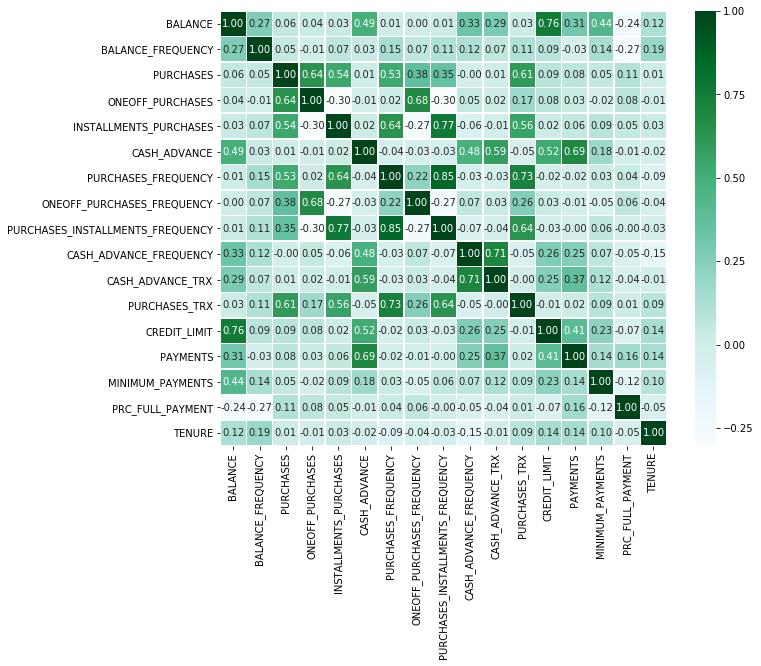

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df_low_both.corr(), cmap = 'BuGn', annot=True, linewidths=.5, fmt= '.2f')

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns[df.columns != 'CUST_ID']
    for i in range(0, df.shape[1] - 1):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

### What percentage of the purchases are one-off vs installments for low spenders?

In [56]:
print('{:.2f}% of low spending customers use only one-off purchases for their purchases' \
.format(len(df_low_spend[(df_low_spend['ONEOFF_PURCHASES'] != 0.0) & \
    (df_low_spend['INSTALLMENTS_PURCHASES'] == 0.0)])/len(df_low_spend[df_low_spend['PURCHASES'] != 0.0])*100))

print('{:.2f}% of low spending customers use only installments for their purchases' \
.format(len(df_low_spend[(df_low_spend['INSTALLMENTS_PURCHASES'] != 0.0) & \
    (df_low_spend['ONEOFF_PURCHASES'] == 0.0)])/len(df_low_spend[df_low_spend['PURCHASES'] != 0.0])*100))
      
print('{:.2f}% of low spending customers use both one-off purchases and installments purchases' \
.format(len(df_low_spend[(df_low_spend['INSTALLMENTS_PURCHASES'] != 0.0) & \
    (df_low_spend['ONEOFF_PURCHASES'] != 0.0)])/len(df_low_spend[df_low_spend['PURCHASES'] != 0.0])*100))      
      

32.13% of low spending customers use only one-off purchases for their purchases
42.53% of low spending customers use only installments for their purchases
25.39% of low spending customers use both one-off purchases and installments purchases


(-1.1086041030991056,
 1.1034260423690823,
 -1.1261160950855436,
 1.101243623575502)

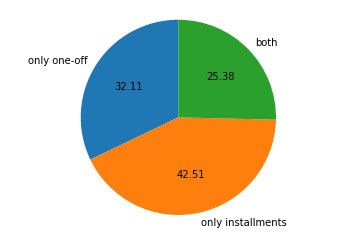

In [163]:
pie_labels = 'only one-off', 'only installments', 'both'
population_share = [32.13, 42.53, 25.39]

figureObject, axesObject = plotter.subplots()
axesObject.pie(population_share, labels=pie_labels, autopct='%1.2f', startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

## Let's see how these high spenders do:
1. how many use both the cash advance as well as purchases
2. how many use solely for cash adances vs purchases
3. how many use solely for purchases
4. on paying their minimum amount due
5. how do they do the purchases - one-off payments or installments

From the data, if the cash advances is non-zero that means that they have used the credit card towards withdrawing cash (from the definition of cash advances).

In [57]:
print('percentage high spending customers who use credit card for both cash advances and \
purchases is {:.2f}%'. format((len(df_high_spend[(df_high_spend['PURCHASES'] != 0.0) \
                                & (df_high_spend['CASH_ADVANCE'] != 0.0)])/len(df_high_spend))*100))

print('percenatge of high spending customers who use credit card only for cash advances and \
not purchases is {:.2f}%'. format((len(df_high_spend[(df_high_spend['PURCHASES'] == 0.0) \
                                & (df_high_spend['CASH_ADVANCE'] != 0.0)])/len(df_high_spend))*100))

print('percentage of high spending customers who use credit card for only purchases and \
not cash advances is {:.2f}%'. format((len(df_high_spend[(df_high_spend['PURCHASES'] != 0.0) \
                                & (df_high_spend['CASH_ADVANCE'] == 0.0)])/len(df_high_spend))*100))

percentage high spending customers who use credit card for both cash advances and purchases is 32.19%
percenatge of high spending customers who use credit card only for cash advances and not purchases is 0.00%
percentage of high spending customers who use credit card for only purchases and not cash advances is 67.81%


(-1.1050530927148086,
 1.1082796077045782,
 -1.1085734827156595,
 1.100408261081698)

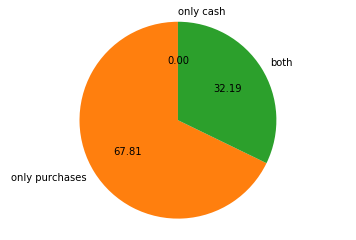

In [164]:
pie_labels = 'only cash', 'only purchases', 'both'
population_share = [0, 67.81, 32.19]

figureObject, axesObject = plotter.subplots()
axesObject.pie(population_share, labels=pie_labels, autopct='%1.2f', startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

### Let's examine how these high spending customers are on paying their minimum amount due.

In [58]:
df_high_both = df_high_spend[(df_high_spend['PURCHASES'] != 0.0) & (df_high_spend['CASH_ADVANCE'] != 0.0)]
df_high_pur = df_high_spend[(df_high_spend['PURCHASES'] != 0.0) & (df_high_spend['CASH_ADVANCE'] == 0.0)]

In [59]:
df_high_spend_good = df_high_spend[df_high_spend['PAYMENTS'] > df_high_spend['MINIMUM_PAYMENTS']]
df_high_spend_bad = df_high_spend[df_high_spend['PAYMENTS'] < df_high_spend['MINIMUM_PAYMENTS']]
print('{:.2f}% high spending customers pay more than their \
minimum amount due'.format(len(df_high_spend_good)/len(df_high_spend) *100))
print('{:.2f}% high spending customers pay less than their \
minimum amount due'.format(len(df_high_spend_bad)/len(df_high_spend) *100))


df_high_both_good = df_high_both[df_high_both['PAYMENTS'] > df_high_both['MINIMUM_PAYMENTS']]
df_high_both_bad = df_high_both[df_high_both['PAYMENTS'] < df_high_both['MINIMUM_PAYMENTS']]
print('{:.2f}% customers (both) pay more than their \
minimum amount due'.format(len(df_high_both_good)/len(df_high_both) *100))
print('{:.2f}% customers (both) pay less than their \
minimum amount due'.format(len(df_high_both_bad)/len(df_high_both) *100))


df_high_pur_good = df_high_pur[df_high_pur['PAYMENTS'] > df_high_pur['MINIMUM_PAYMENTS']]
df_high_pur_bad = df_high_pur[df_high_pur['PAYMENTS'] < df_high_pur['MINIMUM_PAYMENTS']]
print('{:.2f}% customers (purchase only) pay more than their \
minimum amount due'.format(len(df_high_pur_good)/len(df_high_pur) *100))
print('{:.2f}% customers (purchase only) pay more than their \
minimum amount due'.format(len(df_high_pur_bad)/len(df_high_pur) *100))

85.92% high spending customers pay more than their minimum amount due
14.08% high spending customers pay less than their minimum amount due
76.69% customers (both) pay more than their minimum amount due
23.31% customers (both) pay less than their minimum amount due
90.30% customers (purchase only) pay more than their minimum amount due
9.70% customers (purchase only) pay more than their minimum amount due


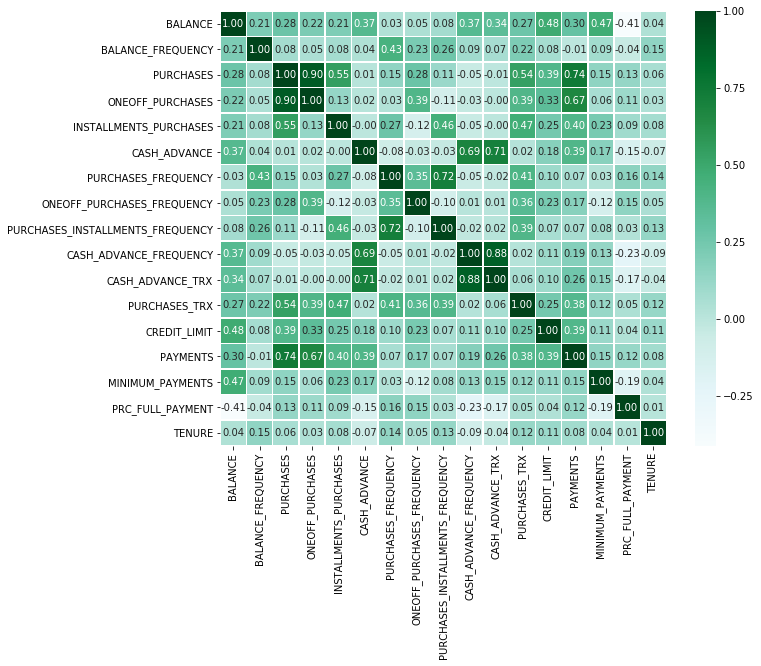

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(df_high_spend.corr(), cmap = 'BuGn', annot=True, linewidths=.5, fmt= '.2f')

### What percentage of the purchases are one-off vs installments for high spenders?

In [61]:
print('{:.2f}% of high spending customers use only one-off purchases for their purchases' \
.format(len(df_high_spend[(df_high_spend['ONEOFF_PURCHASES'] != 0.0) & \
    (df_high_spend['INSTALLMENTS_PURCHASES'] == 0.0)])/len(df_high_spend[df_high_spend['PURCHASES'] != 0.0])*100))

print('{:.2f}% of high spending customers use only installments for their purchases' \
.format(len(df_high_spend[(df_high_spend['INSTALLMENTS_PURCHASES'] != 0.0) & \
    (df_high_spend['ONEOFF_PURCHASES'] == 0.0)])/len(df_high_spend[df_high_spend['PURCHASES'] != 0.0])*100))
      
print('{:.2f}% of high spending customers use both one-off purchases and installments purchases' \
.format(len(df_high_spend[(df_high_spend['INSTALLMENTS_PURCHASES'] != 0.0) & \
    (df_high_spend['ONEOFF_PURCHASES'] != 0.0)])/len(df_high_spend[df_high_spend['PURCHASES'] != 0.0])*100))      
      

15.42% of high spending customers use only one-off purchases for their purchases
10.65% of high spending customers use only installments for their purchases
73.92% of high spending customers use both one-off purchases and installments purchases


(-1.1064506125798308,
 1.1197728126619377,
 -1.1186235802318893,
 1.1008868371538996)

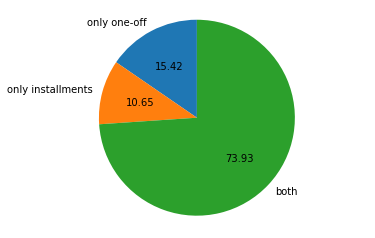

In [165]:
pie_labels = 'only one-off', 'only installments', 'both'
population_share = [15.42, 10.65, 73.92]

figureObject, axesObject = plotter.subplots()
axesObject.pie(population_share, labels=pie_labels, autopct='%1.2f', startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

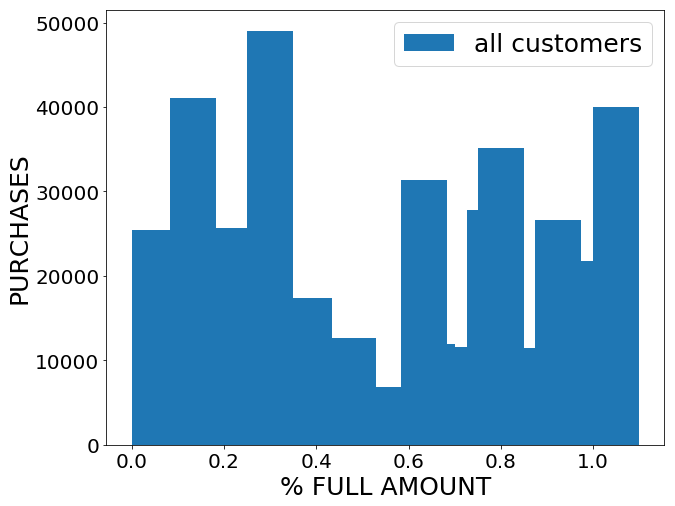

In [155]:
plt.figure(figsize = (10, 8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.bar(df['PRC_FULL_PAYMENT'], df['PURCHASES'], width = 0.1, align = 'edge', label = 'all customers')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('% FULL AMOUNT', fontsize = 25)
plt.ylabel('PURCHASES', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

### Checking if Balance is related to the percentage of full payment - overall, and in both the low spenders, as well as the high spenders.

In [ ]:
#sns.pairplot(df)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text yticklabel objects>)

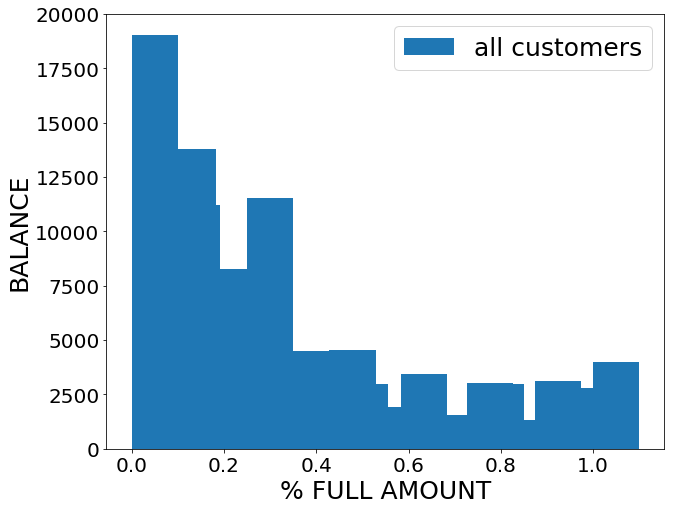

In [139]:
plt.figure(figsize = (10, 8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.bar(df['PRC_FULL_PAYMENT'], df['BALANCE'], width = 0.1, align = 'edge', label = 'all customers')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('% FULL AMOUNT', fontsize = 25)
plt.ylabel('BALANCE', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text yticklabel objects>)

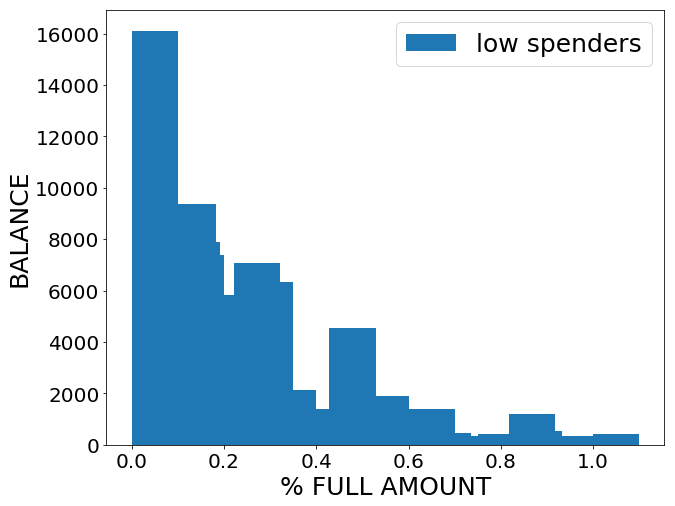

In [140]:
plt.figure(figsize = (10, 8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.bar(df_low_spend['PRC_FULL_PAYMENT'], df_low_spend['BALANCE'],\
        width = 0.1, align = 'edge',  label = 'low spenders')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('% FULL AMOUNT', fontsize = 25)
plt.ylabel('BALANCE', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text yticklabel objects>)

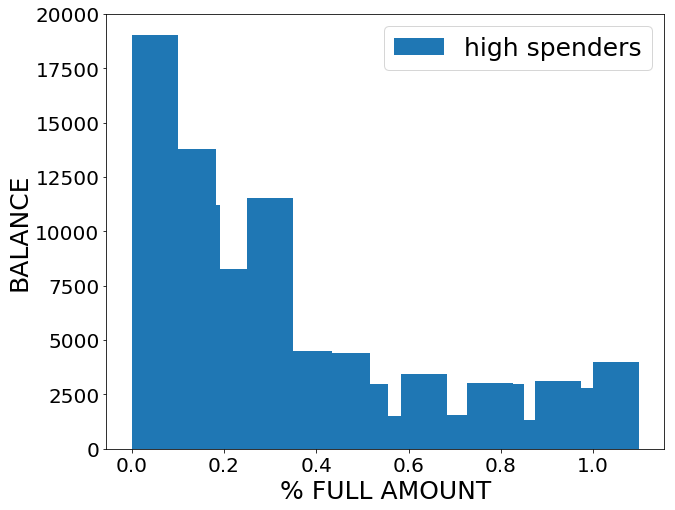

In [141]:
plt.figure(figsize = (10, 8))
axis_tick_font = {'size':'20', 'color':'black'}
plt.bar(df_high_spend['PRC_FULL_PAYMENT'], df_high_spend['BALANCE'],\
        width = 0.1, align = 'edge', label = 'high spenders')
plt.legend(loc = 'best', fontsize = 25)
plt.xlabel('% FULL AMOUNT', fontsize = 25)
plt.ylabel('BALANCE', fontsize = 25)
plt.xticks(**axis_tick_font)
plt.yticks(**axis_tick_font)

There is a relationship between the balance amount and the percentage of full payment. The customers with more balance amount tend not to pay the entire amount, a trend observed for both low as well as high spenders.

For low spenders, this relationship is more prominent.